In [1]:
%matplotlib inline

In [2]:
# Imported libraries
import matplotlib.pyplot as plt
import numpy as np
import sys
from math import pi, pow, tan, radians, sqrt, log, exp
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# IMPROVED OPEN-PIT BENCH BLASTING DESIGN, BASED ON OPTIMIZATION AND MONTE CARLO SIMULATION
# Vol. 1. General information

## Introduction
Mining is one of the most basic human activities, which date for as long as humans have learned to use tools. The future of mankind is dependent on a great number of minerals - sand and stone, iron, copper, gold, alluminum, clays, etc.

<img src="https://me.smenet.org/docs/Publications/ME/Issue/MinBaby.jpg"  width="60%">

This demand for materials such as copper, gold, aluminium, lithium is known to grow due to the expanding development new technologies and equipment, therefore, mining would still have a crucial role for mankind. These types of material are mostly found in medium to hard rock.

Blasting is one of the most important operations in the mining business. All consecutive operations depend on blasting results, mostly on post-blast rock fragment size distribution.
However, little to no public information is available on the actual relationships between the rock fragment distribution and the consecutive costs for loading, hauling, crushing and secondary crushing. In many cases, such information is strictly private and is a result from field data measurements, which are site-specific. Even the biggest mining operations that produce over 10 Mt of ore per year can acquire about 108 osbervations per year (2 blast per week). Moreover, different blasts can be done in different geological domains, which further reduces the number of observations per domain. In addition, to make things even more chellenging, not all mining operations keep records of the blasting results. Regardless of which case one has to deal with, a good starting point are the pre-established theoretical models, which are the so called rules of thumb for every mining operation.

The initial iteration of the problem, before any data is available, to this day is often solved with a pen and paper. However, this is not due to lack of complexity of the problem, but rather due to lack of understanding by a number of blasting engineers. In many cases they do not always take into account the stochastic aspect of the problem and solely rely on formulae to provide a working solution, which in many cases is not optimal. To this day, different cost models have been proposed for estimation the best blast design parameters. However, as practical as they may be, they either neglect certain aspects of the problem, or assume unrealistic dependencies between different factors. Therefore, an improved model should be proposed in order to account for the geological uncertainty and other uncertain factors.


## Aim and objectives
The aim of this case study is to provide a better understanging of how costs can be optimized at the design stage, while implementing rules of thumb from the mining industry and fundamental mathematical concepts such as:
* Calculus for determining the importance of different factors
* A Grid search optimization technique for determing the best cost-effective design parameters solution under certain constraints
* Alternative optimization methods: Search with an accelerated step size and Random search
* Monte Carlo simulation of the rockmass' Uniaxial compressive strength
* Hypothesis testing for comparing whether the proposed solution is an improvement over the conventional one

## An overview of open-pit blasting conditions
The main groups of characteristics regarding blasting can be devided into two major groups: 1) natural factors and 2) artificial factors.

Natural factors include **Rockmass characteristics**, while artifical factors include:
* Blast panel and bench geometry
* Utilized mining explosives
* Choice of mining equipment
* Blast design parameters and charging rules, etc.

### Rockmass characteristics

Rockmass characteristics can depend on three major groups of properties: 
1. physical properties - density, porosity, moisture, etc.
2. mehcanical properties - strenght, hardness, elasticity, Poisson ratio, etc.
3. in-situ characteristics of the rockmass - rockmass surface condition, structural conditions (number of joint sets, joint plane spacing, joint set orientation towards rock slope, joint compressive strength, joint roughness), etc.

Usually preliminary information from geological exploration is available for all three groups. However, during the exploitation of the deposit, geological data is continued to be acquired in order to update the engineers's understanding of the rockmass and the spatial distribution of their properties. A cheap and relatively easy way to to complement geological data is by conducting in-situ tests, which provide an improved understanding on the actual conditions for each consecutive blast.

Here you can see an overview of the rockmass which can be blasted as a regular taks for each bench in open-pit mines.

<img src="https://tagasoft.com/wp-content/uploads/2016/11/RoundHill-1.jpg"  width="80%">

The main estimator for the rockmass is the so calles Rock factor (A). It can be calculated via the following formula:


where 

The main rockmass properties, which are used in the calculations for calculating different blast design features are shown in the following code block:

In [3]:
# Rockmass properties / Свойства на скалния масив

rm_density = 2.75         # Rockmass density (Плътност на скалата от масива), t/m³
rm_rock_factor = 8.19     # Rock factor (Коефициент, отчитащ якостните свойства на скалата и състоянието на масива)
rm_swell_factor = 1.4     # Swell factor (Коефициент на разбухване)

As a sidenote - the rock swelling factor represent how much the volume from the rockmass can "expand" its volume when it is in a bulk and loose state. The volume expansion (swelling) is due to the presense of air among the irregular-shape rock fragments, which leads to them taking more space than the volume of the pre-blast rockmass. 

### Blast panel and bench geometry

The stepwise shape of the pit is known as a bench. In order for rock to be extracted, different portions of the benches are consecutively blasted in a relatively simple shape, similar to a wedge. For big mining operations, e.g. operations dealing with copper mining, the preferred bench height is 15 m and depending on the hardness of the rockmass, usually slopes range between 60° and 75°. Gold mining operations usually deal with smaller benches with a height of 5 to 10 m.

A general representation of how bench blasting is utilized int open-pit mining geometry can be seen on the lower left corner of following photo:

<img src="https://actiondb.com.au/wp-content/uploads/2020/09/ADB-Testimonials-Isaac-Plains-1-1.jpg"  width="50%">

The assumed parameters for this case study are as follows:

In [4]:
# Blast panel geometric features / Геометрични характеристики на взривяваното поле

bp_height = 15            # Bench height (Височина на стъпалото), m
bp_width = 30             # Blast panel width (Широчина на взривяваното поле), m
bp_length = 100           # Blast panel length (Дължина на взривяваното поле), m
bp_slope_angle = 65       # Bench slope angle (Ъгъл на откоса на стъпалото), m

The volume of the blast panel is calculated via the formula:



### Mining explosives
Medim-hard to hard rock are required to be initially fragmented by blasting. It is a quick and relatively cheap way of breking rock into smaller fragments, which are easy to load and transport. The most commonly used blasting agent in mining operations is ANFO (Ammonium Nitrate and Fuel Oil) and its energy nowadays is used for scaling the strength of other mining explosives. Here you can see how it looks like - small white prills loaded either pneumatically or by hand: 

<img src="https://media.licdn.com/dms/image/C5112AQEg2toS9H_IpA/article-inline_image-shrink_1000_1488/0/1576978166489?e=1690416000&v=beta&t=V7_BvGOhAMv5lwBPr1YzIs4iKuktqEOfJJT6n61x0lo"  width="40%">

ANFO is evey quarry's main choice of explosive due to its low selling price. Due to the low value of sand and stone, given that no special environmental requirments are adopted for the quarrying operation, ANFO is usually the best choice from an economic standpoint (given that the fragmentation is satisfactory).


However, there are two more common types of explosive used in the mining industry: watergel explosives and emulsion explosives. In many cases they produce better fragmentation results, due to the higher velocity of detonation and hence the higher detonation pressure they produce. 
Just for fun, during field work, blasting engineers call them with the slang term "sausages".For visual representaion, here is how watergel explosives generally look like.

![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2fCS2VRl-TTslmfpWiDlWxAAqMBA-PnduJUJlSX_OlLaZIESphXa-C3MDXQ2pIoccrxI&usqp=CAU)

Usually watergel explsives are stored in packages with diameters ranging from 30 up to 180 mm (depending on the brand), which makes them versatile for different conditions. Furthermore, the volume of gas products they produce (including toxic gases) is less, which can be favourable in terms of environmental impact and work safety. In general, the volume of gas products corresponds with the ability of the blast to "throw" the material. From an engineering perspective, a good blast is not judged by how cool it looks, but rather how subtle it is. Hence, watergel explosive may be a better choice when the scale of impact should be minimized, compared to ANFO.

However, in many cases when dealing with higher benches and harder rock formations (e.g. iron or copper mining), a more powerful explosive is required. Here is a photo, where one can see how a drillhole is loeaded with an emuslion explosive.

<img src="https://www.nelsonbrothers.com/assets/images/buckets/Loading-emulsion2.jpg"  width="30%">

Therefore, fewer amount of these two explosives can produce better fragmentation results than ANFO. However, these two types may not always prefered due to their higher price (approximately over 2 times more expensive than ANFO). Hence, for shorter benches (up to 10 m), usually ANFO is prefered, generally speaking.

As a rule of thumb, benches over 15 m use primarily emulsion explosives. This is due to the dicrease of the velocity of detonation (VOD) along the bench height when using lower energy explosives (such as ANFO or some watergel explosives), which results in poor fragmentation and worse uniformity of the material.

The assumed explosive porperties and price for this case study can be seen bellow and were chosen for Emulsion explosive:

In [5]:
# Explosive properties / Свойства на взривното вещество

expl_density = 1.1       # Explosive density (Плътност на взривното вещество), g/dm³ (t/m³)
expl_rws = 116            # Relative weight strength (Относителна тегловна енергия)
expl_price = 1.51         # Explosive price (Цена на взривното вещество), EUR/kg

### Mining equipment and operational costs evaluation
Mining operations rely to great extend on electricity and fuel. For this basic model of the mining operation, the energy source considered for all mining equipment is diesel fuel. The price assumed for this case study can be seen below:

In [6]:
# Energy sources for mining operation / Източници на енергия използвана в минния обект

energy_diesel_price = 1.6  # Diesel price (Цена на гориво - дизел), EUR/l

In order to achieve rock fragmentation, blasting agents are loaded in pre-drilled holes. They are situated in rectangular or staggered pattern so that uniform fragmentation is achieved along the blast panel. 



However, in reality every drillhole is always placed in a position, deviating from its planned one. Therefore, this deviation can skew the uniformity of the rock fragments (more on that below). The main parameters used for this analysis are shown as follows:

In [7]:
# Blast panel drillhole features / Параметри на взривните сондажи

bp_dh_diameter = 200      # Drillhole diameter (Диаметър на взривните сондажи), mm
bp_dh_dev = 0.1         # Drillhole location deviation (Отклонение на устието на сондажите от проектното), m

Based on the drill's diameter, number of drillholes and hourly fuel consumptions, costs and drilling time can vary significantly. 

<img src="https://img.directindustry.com/images_di/photo-g/20626-18002129.jpg"  width="40%">

The assumed values for the drilling equipment are listed below: 

In [8]:
# Drilling equipment specs / Параметри на сондата

drill_h_rate = 25                                   # Drilling rate (Скорост на пробиване), m/h
drill_h_fuel = 62.31                                # Drilling fuel consumption per hour, (Разход на гориво при 1 h сондиране) l/h
drill_h_costs = drill_h_fuel * energy_diesel_price  # Drilling costs (Разходи за пробиване), EUR/h

Excavators are essential for every open-pit mining operation. Their main task is to shovel the blasted rock fragments into trucks. Excavators work in a cyclical manner and it takes about 4 to 6 shovels to fill in a truck.

<img src="https://www.hard-line.com/wp-content/uploads/2021/04/IM-Mighty-Maple-Leaf-1.jpg"  width="50%">

The most important features of a backhoe excavator used in this case study are listed below:

In [9]:
# Excavator equipment specs / Параметри на багера

loader_bucket_vol = 27.5                                # Bucket volume (Геометричен обем на кофата на багера), m³
loader_s_cycle = 30                                     # Excavator cycle time (Цикъл на работа на багера), s
loader_h_fuel = 225.39                                  # Excavator fuel consumption per hour
loader_h_costs = loader_h_fuel * energy_diesel_price    # Excavator costs (Разходи за работа на багера), EUR/h

Trucks are also essential, just like excavators. They have proven over the years their capability of being reliable and flexible mining equipment. They tend to be better suited especially when dealing with complex mine designs for complex ore body geometriy. 

<img src="https://www.crown.co.za/images/Latest_news_2020/capital-equipment/XCMGs_700_t_excavator_proves_its_worth_in_coal_mining.jpg"  width="50%">

Their main specifications can be seen below:

In [10]:
# Truck equipment specs / Параметри на автосамосвала

truck_cap_vol = 130                                    # Truck capacity volume (Вместимост на коша на автосамосвала), m³
truck_cap_t = 320                                      # Truck payload capacity (Товароносимост на автосамосвала), t

truck_min_haul = 15                                    # Truck haul time (Време на курса на автосамосвала), min
truck_h_fuel = 311.74                                  # Truck fuel consumption per hour
truck_h_costs = truck_h_fuel * energy_diesel_price     # Truck haul costs (Разходи за транспорт), EUR/h

Crushers are essential for a mining operation, when speaking obout processing of the rock mass. The point of crushing is that the material should be prepared for grinding to a very small size (usually µm) which makes the separation and classification of the ore mineral grains from other inclusions. A general overview of a crusher can be seen on the follwoing photo:

<img src="https://www.metso.com/contentassets/7958faee54a14c1c8bff59463f3fd376/lt330d-mobile-cone-crusher-w-person-img-4448.jpg?preset=showroom-large-thumb"  width="50%">

Depending on the required feed size of the material, a certain ammount of rock fragmetns would remain impossible to crush and hence require additional breakage. Of course, this requires more time and costs and therefore oversized fragmetns should be minimized. A good rule of thumb is that the oversize should be no less than 5% of the fragments. In addition, the assumed feed size for the crusher is 1000 mm, as shown below:

In [11]:
crusher_feed = 1000                  # Crusher feeed, mm
max_oversize_p = 5                   # Allowable oversize, %

### Blast design and charging rules

Now that we covered all the basic assumtions and information on an open-pit mining operation, let's see how a blast design parameters are calculated. One of the essential design parameters in the Soviet and Western schools of thought is the *burden*. It can be interpreted as **the distance which the explosive energy must through from the rockmass to the free face in order for the rock to break into fragments of reasonable size**. The further the explosive from the free face, the more explosive energy is required and vise versa - the closer it is, less energy is reuqired. 
However, as simple as it may look and sound, during the last 70 years more than 30 different empirical formulas have been proposed by both schools of thought and all 30 work well in certain conditions!

A good example is the following formula (Ozdemir and Kumral, 2018):

$B = 0.03780 \cdot D \cdot (\frac{\rho_{e}}{\rho_{r}})^{0.333}$ , m

where $B$ is the burden of the blast, m; $D$ is the diameter of the drillhole, mm; $\rho_{e}$ is the bulk density of explosive (t/m³) and $\rho_{r}$ is the bulk density of the rockmass (t/m³)


Here is a code block implementing the formula into a function:

In [12]:
# Burden / Линия на най-малко съпротивление (ЛНС)

example_burden = 0.03780 * bp_dh_diameter * pow((expl_density/rm_density),(1/3))
print(f"The formula yields a Burden of {example_burden:.2f} m")

The formula yields a Burden of 5.57 m


Usually, in most blast design project the burden is calculated via a single formula from a preferred mining engineering or blasting handbook. For example the spacing for a staggered and sqaure drillhole patterns can be calculated the following way:

**For a square drillhole pattern:**

$S = B$ , m


**For a staggered pattern of drillholes, placed in the edges of a equilateral triangle (for best fragmentation):**

$S = B \cdot \frac{\sqrt{3}}{2}$ , m

where $S$ is the assumed spacing between drillholes in a row for the blast panel, m

In [13]:
example_spacing_sq = example_burden
example_spacing_staggered = example_burden * sqrt(3) / 2

print(f"Square patterm spacing:  {example_spacing_sq:.2f} m, \n\
Staggered pattern spacing: {example_spacing_staggered:.2f} m")

Square patterm spacing:  5.57 m, 
Staggered pattern spacing: 4.82 m


For estimating the subdrilling and stemming, the following formulae can be used (Джобов и Копрев, 2014):

$SD = (0.1 \div 0.3) \cdot B$ , m

$ST = (0.5 \div 1.0) \cdot B$ , m 

where $SD$ is the subdrilling length, m; and $ST$ is the stemming length, m

In [14]:
example_subdrilling = 0.3 * example_burden
example_stemming = 1.0 * example_burden

print(f"Subdrilling:  {example_subdrilling:.2f} m, \n\
Stemming: {example_stemming:.2f} m")

Subdrilling:  1.67 m, 
Stemming: 5.57 m


However, all these formulae are empirical and a good engineer can conclude that even the best formula may not work well in all cases. Furthermore, all other blast design parameters derive from the calculated value via empirical coefficients. However, this  phenomenon is taken into account, as these formulae allow the engineer to choose coefficients in a certain range.

Although, this gives engineers flexibility, in most cases the assumed burden vlaue is the main reason for undesirable results in terms of fragmentation. Nowadays, this approach may seem outdated, although the majority of mining engineers still rely to this on the pen and paper approach and their practical experience. Nonetheless, O-Pitblast (one of the most prominent blasting software companies) have implemented a solver in their program for estimating the optimal design parameters, which achieve the best economic value, depending on user-input constraints. Now that's more like it! 

If you are interested in checking it out, you can follow [this link](https://www.youtube.com/watch?v=rjAMi_TLmIc&ab_channel=O-Pitblast) for a short video and [this link](https://downloads.o-pitblast.com/files/manual/O-Pitblast%20Manual%202021.pdf) to their software manual.

The model itself is basic, but is very helpful for practical work. So let's see what we can do about improving its functionalities. 

First, let's see how the remaining parameters for each drillhole are calculated, i.e. the charging rules (Джобов и Копрев, 2014):

**Drillhole length, m:**

$DH_{length} = H + SD$

where $H$ is the bench height, m; 

**Drillhole charge length, m:**
    
$DH_{\text{charge length}} = DH_{length} - ST$

**Drillhole charge mass:**

$DH_{\text{charge mass}} = DH_{\text{charge length}} \cdot \rho_{e} \cdot \frac{\pi}{4} \cdot \frac{D^{2}}{1000}$

**Drillhole specific charge:**

$DH_{\text{spec. charge}} = \frac{DH_{\text{charge mass}}}{B \cdot S \cdot H}$

All of the formulae from above are implemented in the following code block:

In [15]:
def calc_bp_dh_charge(bp_burden, bp_spacing, bp_height,
                      bp_dh_subdrilling, bp_dh_stemming, bp_dh_diameter,
                      expl_density):
    ''' Calculates drillhole and charge parameters - drillhole length, charge length, explosive mass, specific charge
    Изчислява конструкцията на заряда за взривен сондаж - дължина на сондажа, дължина на зярада, количество ВВ,
    и относ. разход на ВВ '''

    bp_dh_length = bp_dh_subdrilling + bp_height
    bp_dh_exp_length = bp_dh_length - bp_dh_stemming
    bp_dh_exp_mass = expl_density * bp_dh_exp_length * (bp_dh_diameter ** 2) * pi / 4 / 1000
    bp_dh_spec_charge = bp_dh_exp_mass / (bp_burden * bp_spacing * bp_height)
    bp_dh_charge_dict = {"DH length, m": bp_dh_length, "DH charge length, m": bp_dh_exp_length,
                         "DH charge mass, kg": bp_dh_exp_mass, "DH spec. charge, kg/m³": bp_dh_spec_charge}

    return bp_dh_charge_dict

As we have already established some blast design pattern parameters, here is an exaplme of the results from calculating the chargin rules.

In [16]:
example_dh_charge = calc_bp_dh_charge(example_burden, example_spacing_sq, bp_height, 
                                      example_subdrilling, example_stemming, bp_dh_diameter, expl_density)

for k, v in example_dh_charge.items():
    print(f"{k}: {v:.2f}")

DH length, m: 16.67
DH charge length, m: 11.10
DH charge mass, kg: 383.62
DH spec. charge, kg/m³: 0.82


Next, let's see how the overall parameters for the blast panel are calculated (Джобов и Копрев, 2014).

**Drillhole rows:**

$DH_{rows} = \frac{BP_{width} - 3 - \bigl[(BP_{width} - 3)\mod B\bigr]}{B}$

**Drillholes per row:**

$DH_{\text{holes per row}} = \frac{BP_{length} - \bigl(BP_{length}\mod S\bigr)}{S}$

**Total drillholes length, m:**

$BP_{\text{total d.h. length}} = BP_{\text{d.h. count}} \cdot DH_{length}$

**Blast panel volume, m³:**

$BP_{vol} = H \cdot (BP_{width} \cdot BP_{length} \cdot \frac{1}{\tan{\alpha}})$

**Total explosive mass, kg:**

$BP_{\text{total expl. mass}} = BP_{\text{charge mass}} \cdot BP_{\text{d.h. count}}$

where $BP_{\text{d.h. count}}$ is the total number of drillholes for the blast panel

**Blast panel Powder factor, kg/m³:**

$BP_{\text{powder factor}} = \frac{BP_{\text{total expl. mass}}}{BP_{vol}}$

In [17]:
def calc_bp_total(bp_height, bp_width, bp_length, bp_slope_angle,
                  bp_burden, bp_spacing, bp_dh_length, bp_dh_exp_mass):
    ''' Calculates overall blast panel charging parameters - rows, drillholes per row, total drillhole count,
    total drillhole length, total rock volume and total explsoive mass
    Изчислява общите параметри за взривяваното поле - брой редове, брой сондажи в ред, брой сондажи,
    общ обем пробивни работи, обем взривявана скална маса и общо количество ВВ '''

    bp_dh_rows_cnt = (bp_width - 3) // bp_burden + 1
    bp_dh_per_row_cnt = bp_length // bp_spacing + 1
    bp_total_dh_cnt = bp_dh_rows_cnt * bp_dh_per_row_cnt
    bp_total_dh_length = bp_total_dh_cnt * bp_dh_length
    bp_total_volume = bp_height * (bp_width * bp_length + 1 / tan(radians(bp_slope_angle)))
    bp_total_exp_mass = bp_dh_exp_mass * bp_total_dh_cnt
    bp_total_pf = bp_total_exp_mass / bp_total_volume
    bp_total_dict = {"Rows": bp_dh_rows_cnt, "DHs per row": bp_dh_per_row_cnt,
                     "Total DH count": bp_total_dh_cnt, "Total DH length, m": bp_total_dh_length,
                     "Total rock volume, m³": bp_total_volume, "Total explosive mass, kg": bp_total_exp_mass,
                     "Overall powder factor, kg/m³": bp_total_pf}

    return bp_total_dict

Once more, another example can be seen below, by implementing the pre-established parameters.

In [18]:
example_bp_total = calc_bp_total(bp_height, bp_width, bp_length, bp_slope_angle, 
                                 example_burden, example_spacing_sq, 
                                 example_dh_charge["DH charge length, m"], example_dh_charge["DH charge mass, kg"])

for k, v in example_bp_total.items():
    print(f"{k}: {v:.2f}")

Rows: 5.00
DHs per row: 18.00
Total DH count: 90.00
Total DH length, m: 999.07
Total rock volume, m³: 45006.99
Total explosive mass, kg: 34525.52
Overall powder factor, kg/m³: 0.77


## Basics of rock fragmentation theory
Now that we know how the panel is drilled and how different drillholes are charged, it is time to talk about the expected fragmentation result. 

This is a very complex process which cannot be observed with a very high accuracy for each drilhole due to the lack of full understanding of the rocks properties and distribution in the rockmass and the high price of conducting exhaustive fields tests with different monitoring eqipment. Therefore, for practical reasons empirical formulas are primarily used, which provide a good estimation on what fragmentation results should be expected. 


Two of the major parameters, determing the quality of fragmentation are the Mean rock fragment size (X50) and the Uniformity index. They are relativley similar to the scale and shape factors of the Weibull distribution and we will see later why that applies to this case.

One easy way to estimate the expected Mean rock fragment size is via Kuznetsov's empirical formula. It was modifed by C. V. B. Cunningham and to this day it still works well and is used for blast design validation, when no other more complex regression or machine learning models are established for the mining operation. The formula for determining the expected mean fragment size (X50) is as follows (Gheibe et al., 2009):

$X_{50} = A \cdot K^{-0.8} \cdot Q_{e}^{1/6} \cdot \left(\frac{115}{S_{ANFO}}\right)^{19/30}$, cm

where $X_{50}$ is the mean (actually median, but people refer to it that way for some obscure reason) fragment size, mm;

$A$ is the rock factor

$K$ is the specific charge for the drillhole charging rule, kg/m³ (we assumed it to be labeled as $DH_{\text{spec. charge}}$);

$Q_{e}$ is the mass of the explosive used in a drillhole (charge mass), kg (we assumed it to be labeled as $DH_{\text{charge mass}}$);

$S_{ANFO}$ is relative weight strength for the explosive, scaled by ANFO (for ANFO the parameter assumes $S_{ANFO} = 100$)

Here is how it looks in a Pythonic way.

In [19]:
def calc_x50(bp_dh_exp_mass, bp_dh_spec_charge, rm_rock_factor, expl_rws):
    # Calculates and returns the value of the Median rock fragment size (X50) based on the original formula by Cunningham
    # Изчислява и връща стойността на средния размер скален къс (X50) на базата на първоначалната формула на Cunningham
    
    x50 = rm_rock_factor * \
    pow(bp_dh_spec_charge, -0.8) * \
    pow(bp_dh_exp_mass, (1/6)) * \
    pow((115/expl_rws), (19/30))
    
    return x50 * 10

Let's see how what results can be acquired from our established charging rules:  

In [20]:
example_x50 = calc_x50(example_dh_charge["DH charge mass, kg"], example_dh_charge["DH spec. charge, kg/m³"], rm_rock_factor, expl_rws)

print (f"Expected mean fragment size (X50): {example_x50:.0f} mm")

Expected mean fragment size (X50): 256 mm


This is an acceptable value, however, the solution is far from being optimal.

For theretical and practical reasons, statistical distributions tend to be very helpful when dealing with particles with different sizes. The distribution of rock fragments after breakage is established to follow a Weibull distribution (a Rosin-Rammler distribution to be more precise). For almost a century, it has been extensively used to describe the distribution of particles with different sizes in mineral processing and from the 1980s for blast fragmentation results, as well. The reason why distributions are very useful when dealing with particles is because the Cumulative density function (CDF) of the rock fragments' size is actually the curve from Sieve anaysis of the material.
So, how is the rock fragment size distribution is applicable for bigger rock fragments? The primary reason is because rock fragments larger that the crusher's feed are regarded as oversize and blasting engineers must be aware of that. Whenever oversize fragments appear, they require either secondary blasting or mechanical breakage by hydraulic hammers. Here is a good example how big can oversize "fragments" be:

<img src="https://www.miningreview.com/wp-content/uploads/2016/06/Poor-fragmentation-results-as-a-result-of-poor-blast-preparation..jpg"  width="60%">

In case, one can see that they are the size of boulders.

Theorectical models in terms of determining the rock fragmentation distribtuion were also proposed, which additionally take into account fine material. Their accuracy is arguably better than the Rosin-Rammler distribution model, however, they are not always implemented in all blast design softwares. 

The Rosin-Rammler distribution relies on the so called Uniformity index, which quantifies how uniform the post-blast fragments are in terms of their size. This can be illustrated from the picture below:

![Alt image](n3.jpg)
![Alt image](n2.jpg)
![Alt image](n1.5.jpg)
![Alt image](n1.25.jpg)
![Alt image](n1.jpg)
![Alt image](n0.75.jpg)
![Alt image](n0.5.jpg)

In terms of open-pit blasting, the Uniformity index ($n$) is dependent on the charging rules, as it can be seen below, following Cunningham's model (Gheibe et al., 2009):

$n = \left(2.2 - 14\frac{B}{D}\right)\left(\frac{1}{2} + \frac{S}{2B}\right)^{0.5}\left(1 - \frac{W}{B}\right)\left(\frac{L}{H}\right)$

where $D$ is the drillhole diameter, mm;

$W$ is the standard deviation of the drilling accuracy, m

$L$ is the charge length for the drillhole, m;

And again, this is the Pythonic way to do it:

In [21]:
def calc_uniformity_idx(bp_burden, bp_spacing, bp_dh_diameter, bp_dh_exp_length, bp_dh_dev, bp_height, bp_dh_pattern):
    # Calculates and returns the value of the Uniformity index value based on original formula, proposed by Cunningham
    # Изчислява и връща стойността индекса на еднородост по първоначалната формула на Cunningham
    
    p = 1 # Pattern type coefficient (Коефициент, отчитащ вида на мрежата)
    if bp_dh_pattern == "staggered":
        p = 1.1
    elif bp_dh_pattern == "regular":
        p = 1
        
    n = (2.2 - 14 * bp_burden / bp_dh_diameter) * \
        sqrt(0.5 + 0.5 * bp_spacing / bp_burden) * \
        (1 - bp_dh_dev / bp_burden) * \
        (bp_dh_exp_length / bp_height) * p
    
    return n

Here is an example of what value does the Uniformity index take, based on the old formula by Cunningham:

In [22]:
example_uniformity_idx = calc_uniformity_idx(example_burden, example_spacing_sq, bp_dh_diameter, 
                                                 example_dh_charge["DH length, m"], bp_dh_dev, bp_height, "regular")

print(f"Uniformity index (n): {example_uniformity_idx:.2f}")

Uniformity index (n): 1.98


Thus, when the X50 and Uniformity index values are calculated, they are feeded into the CDF formula for the Rossin-Rammler distribution. The result yeilds the fraction of the material passing a sieve openining with a size of $X$ mm. The formula is as follows (Gheibe et al., 2009):

$R_{m} = 1 - e^{-(X/X_{c})^{n}}$

where $X_{c}$ is the characteristic size of the distribution (mm) and it is calculated by the follwoing equation (Gheibe et al., 2009):

$X_{c} = \frac{X_{50}}{\sqrt[n]{0.693}}$

The following function returns the cumulative probability value for a rock fragment of size *x*.

In [23]:
def kuz_ram_model(n, x50, x):
    # Returns the percent passing value for a rock fragment size, based on the Rosin-Rammler distribution
    # Връща стойността на процента преминал материал при даден размер скален къс на базата на разпределението на Rosin-Rammler
    
    x_c = x50/pow(0.693, 1/n)
    p = 1 - 1/exp(pow((x/x_c), n))
    
    return 100*p

In [24]:
kuz_ram_model_vectorized = np.vectorize(kuz_ram_model)

Now that we have everything, we should define a function which can plot the distribution of rock fragments of different particle sizes, so that we get a visual representation of how well is the blast design planned.

In [25]:
def plot_kuz_ram_result(crusher_feed, x50, uniformity_idx, f_colour = "tab:blue", f_label = "Old uniformity model"):
    ''' Plots the CDF of the rock fragments for the Kuz-Ram model 
    Чертае кумулативната плътност на разпределението на скалните късове по модела Kuz-Ram '''

    x = np.arange(0, crusher_feed + 1000, 10)

    kuz_ram_model_vectorized = np.vectorize(kuz_ram_model)
    y = kuz_ram_model_vectorized(uniformity_idx, x50, x)

    plt.scatter(crusher_feed, kuz_ram_model(uniformity_idx, x50, crusher_feed), c = f_colour)
    x_const = np.linspace(0, crusher_feed + 1, 1000)
    y_const = np.linspace(0, kuz_ram_model(uniformity_idx, x50, crusher_feed), 1000)
    
    plt.axvline(crusher_feed, color = 'black', linestyle = 'dashed', linewidth = 2)
    plt.plot(x_const, [kuz_ram_model(uniformity_idx, x50, crusher_feed)] * 1000, color='black', linestyle="--")
    
    plt.plot(x, y, label = f_label)
    plt.xlabel("Rock fragment size, mm")
    plt.ylabel("Passing, %")

    plt.xlim(0, crusher_feed + 1000)
    plt.ylim(0, 101)

Here one can see how the expexted CDF looks like for this example considering the assumed blast design parameters and chargin rules. The horizontal and vertical punctured lines indicate the point from the curve whicх refers to the oversize probability (rock fragments with a size over 1000 mm).

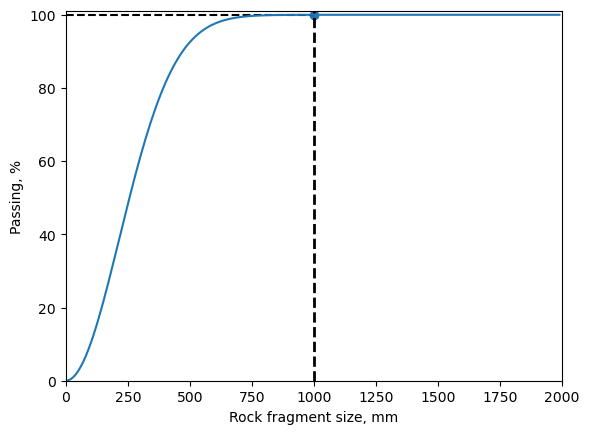

Expected oversize percentage: 0.00%


In [26]:
plot_kuz_ram_result(crusher_feed, example_x50, example_uniformity_idx)
plt.show()
example_oversize = 100 - kuz_ram_model(example_uniformity_idx, example_x50, crusher_feed)
print(f"Expected oversize percentage: {example_oversize:.2f}%")

This example gives a good feel of how empirical formulas can provide good results, but we still do not have proof whether this is the most cost efficient design. In order to reach to an optimal solution, we should point out some concerns, related to the Kuz-Ram model.

### Concerns regarding the Kuz-Ram model
In many cases the original Kuz-Ram model and other alternative fragmentation models do not a superb prediction accuracy. In cases when working with softer rock formations, as well as in heterogenous rock formations (which are the majority types of conditions), the model gives a bias result for a certain rock type. However, in order to make the model more flexible, Cunningham proposed the use of two empirical coefficient for correcting both formula-based values of the Mean rock fragment size (X50) and the Uniformity index (n).
The new proposed formula is as follows (Cunningham, 2005):

$n = n_{s}\sqrt{2 - \frac{30B}{d}} \sqrt{\frac{1 + S/B}{2}} \left(1 - \frac{W}{B}\right)\left(\frac{L}{H}\right)^{0.3}C(n)$

where $C(n)$ is a correction factor which allows to enable the estiamtion of changes of the results depending on the in-situ conditions

Here is a block of code which implements it as a Python function:

In [27]:
def calc_uniformity_idx_mod(bp_burden, bp_spacing, 
                            bp_dh_diameter, bp_dh_exp_length, bp_dh_dev, 
                            bp_height, rm_rock_factor, c_n = 1):
    '''Calculates and returns the value of the Uniformity index value based on updated formula, proposed by Cunningham
    Изчислява и връща стойността индекс на еднородост по обновената формула на Cunningham'''
    
    n = sqrt(2 - 30 * bp_burden / bp_dh_diameter) * \
        sqrt(0.5 + 0.5 * bp_spacing / bp_burden) * \
        (1 - bp_dh_dev / bp_burden) * \
        pow((bp_dh_exp_length / bp_height), 0.3) * c_n
    
    return n

Nowe, that we have a different mode, let's view an example of what to expect when working with the modified formula without assuming any corrections for the value of *n*.

In [28]:
example_uniformity_idx_mod = calc_uniformity_idx_mod(example_burden, example_spacing_sq, 
                                                     bp_dh_diameter, example_dh_charge["DH charge length, m"], bp_dh_dev, 
                                                     bp_height, rm_rock_factor)

print(f"Uncorrected value for the Uniformity index (n): {example_uniformity_idx_mod:.2f}")

Uncorrected value for the Uniformity index (n): 0.97


OK, this is what we initially expected - there is a big difference between both results. Let's check how both curves, related to both formulae differ from each other.

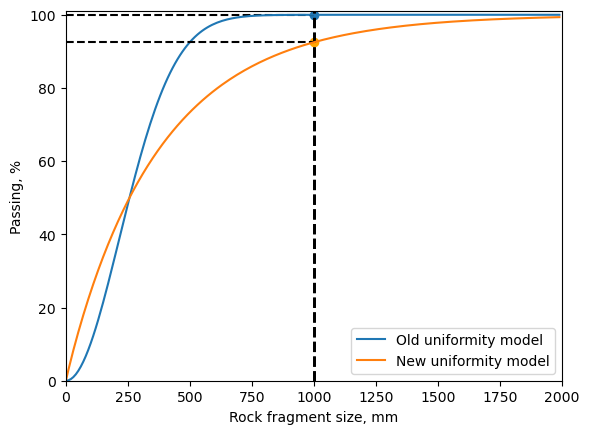

Expected oversize percentage, based on old model: 0.00%
Expected oversize percentage, based on new model: 7.50%


In [29]:
plot_kuz_ram_result(crusher_feed, example_x50, example_uniformity_idx, "tab:blue", "Old uniformity model")
plot_kuz_ram_result(crusher_feed, example_x50, example_uniformity_idx_mod, "Orange", "New uniformity model")
plt.legend()
plt.show()

old_oversize = 100 - kuz_ram_model(example_uniformity_idx, example_x50, crusher_feed)
modified_oversize = 100 - kuz_ram_model(example_uniformity_idx_mod, example_x50, crusher_feed)
print(f"Expected oversize percentage, based on old model: {old_oversize:.2f}%")
print(f"Expected oversize percentage, based on new model: {modified_oversize:.2f}%")

The difference between both results is evident. And therefore, the use of empirical coefficients for correction is absolutely necessary. However, in a stage where no prior data of fragmentation results is available, both models are a gues of the actual result. Hence, given enough trails (blasting activities) in the same geological and structural domain, one can estimate both coefficients for sectors of the pit (Law of large numbers). 
<img src="geological_and_structural_domains.jpg"  width="70%">

Nonetheless, newer empirical models are propsed based on machine learning, but this is a topic for another time...

Let's see now what we can learn from the assumed design parameters and charging rules in terms of operational costs.

## Operational costs
For this case study, the operational costs, which can be established accurately include:
* Drilling costs
* Blasting costs
* Loading costs
* Hauling costs

Crushing, grinding and sieving costs are hard to determine as the relationship between the Mean fragment size, the X80 fragment size (the 80th percentile from the Rosin-Rammler distribution) and the energy required for crushing are not available for public use. Therefore this case study deals only with the mining side of the operational costs and does not implement mineral processing costs. Crushing costs are dependent on the blasted rock size fragments distribution. Usually, mining companies and consultant companies have their own private empirical models, based on field data. Such models are difficult to acquire, however, as a rule of thumb mining operations rely on ensuring no more than 5-10% oversize. Therefore mining costs should be minimized in order to facilitate blasting results with an oversize no larger than 5%. 

### Drilling costs

Drilling costs and the time required for drilling are estiamted via the basic formula:

$C_{drilling} = \frac{BP_{\text{total d.h. length}} \cdot c_{d}}{Q_{drill}}$, EUR

$T_{drilling} = \frac{BP_{\text{total d.h. length}}}{Q_{\text{drill}}}$, machine hours


The following function calculates the costs and time required for drilling the blast panel according to the assumed drilling pattern.

In [30]:
def calc_drilling(bp_total_dh_length, drill_h_rate, drill_h_costs):
    # Returns Drilling costs
    # Връща разходите за пробивни работи
    
    costs = bp_total_dh_length * drill_h_costs / drill_h_rate / 1000
    time = bp_total_dh_length / drill_h_rate
    drilling_result_dict = {"Costs": costs, "Time": time}
    
    return drilling_result_dict

Of course, here is an example of the results from the assumed blast panel and design parameters.

In [31]:
example_costs_drilling = calc_drilling(example_bp_total["Total DH length, m"], drill_h_rate, drill_h_costs)

print(f'Drilling costs: {example_costs_drilling["Costs"]:.2f} kEUR')
print(f'Drilling time needed: {example_costs_drilling["Time"]:.2f} machine hours')

Drilling costs: 3.98 kEUR
Drilling time needed: 39.96 machine hours


### Blasting costs
The blasting costs are calculated via the following formulae:

$C_{blasting} = BP_{\text{total expl. mass}} \cdot c_{expl.}$, EUR

In [32]:
def calc_blasting(bp_total_exp_mass, expl_price):
    # Returns Blasting costs
    # Връща разходите за взривяване
    
    costs = bp_total_exp_mass * expl_price / 1000
    blasting_result_dict = {"Costs": costs, "Time": "Not included in project"}
    
    return blasting_result_dict

An here is an example what result to expect in this case study.

In [33]:
example_costs_blasting = calc_blasting(example_bp_total["Total explosive mass, kg"], expl_price)

print(f'Blastinging costs: {example_costs_blasting["Costs"]:.2f} kEUR')
print(f'Blastinging time: {example_costs_blasting["Time"]}')

Blastinging costs: 52.13 kEUR
Blastinging time: Not included in project


### Loading costs
Loading costs depend mainly on three major factors - the excavator's producitivity, its hourly fuel consumption and the diesel price. The only factor, over which mining engineers have control is the excavator's productivity. It can be estimated via the formula:


The bucket fill factor depends heavily on the post-blast fragmentation result. Therefore, it is one of the major components of the loading productivity and hence the loading costs. For the purpose of this case study we can use a modified version of the linear model proposed by Ozdemir and Kumral (2018), based on field measurements:

$F(X_{50}) = -0.0022 \cdot X_{50} + 0.8833$

where $F(X_{50})$ is the Fill factor for the excavator's bucket.

Here is how the formula is implemented as a Python function:

In [34]:
def set_fill_factor(x50):
    '''Returns loader bucket fill factor depening on Median rock fragment size (X50)
    Връща коефициента на напълване на кофата на база на среден размер на скалните късове (X50) '''
    
    return -0.0022 * x50/10 + 0.8833

As a example, let's see what result does the formula produce for our assumed values for the Mean fragment size.

In [35]:
example_fill_factor = set_fill_factor(example_x50)

print(f"The excavator fill factor is expected to be: {example_fill_factor:.2f}")

The excavator fill factor is expected to be: 0.83


The excavator's hourly productivity can be calculated via the follwoing basic formula:

$Q_{excavator} = \frac{3600 \cdot F \cdot E}{t_{\text{exc. cycle}} \cdot SF}$ , m³/h

where $E$ is the excavator's bucket capacity, m³;

$t_{\text{exc. cycle}}$ is the excavator's cycle time, s;

$SF$ is the swelling factor of the material

In [36]:
example_loader_h_prod = 3600 / loader_s_cycle * example_fill_factor * loader_bucket_vol / rm_swell_factor

print(f"The expected hourly material output for the excavator is: {example_loader_h_prod:.2f} m³/h")

The expected hourly material output for the excavator is: 1949.17 m³/h


The operational costs regarding the excavator and the time required for clearing the blasted panel are calculated via the following basic formulae:

$C_{loading} = \frac{BO_{vol} \cdot c_{excavator}}{Q_{excavator}}$, EUR

$T_{loading} = \frac{BO_{vol}}{Q_{excavator}}$, machine hours

In [37]:
def calc_loading(bp_total_volume, loader_h_prod, loader_h_costs):
    # Returns Loading costs
    # Връща разходите за изкопно-товарни работи
    
    costs = bp_total_volume * loader_h_costs / loader_h_prod / 1000
    time = bp_total_volume / loader_h_prod
    loading_result_dict = {"Costs": costs, "Time": time}
    
    return loading_result_dict

Here is the result for the laoding costs, based on the considered example.

In [38]:
example_costs_loading = calc_loading(example_bp_total["Total rock volume, m³"], example_loader_h_prod, loader_h_costs)

print(f'Loading costs: {example_costs_loading["Costs"]:.2f} kEUR')
print(f'Loading time: {example_costs_loading["Time"]:.2f} machine hours')

Loading costs: 8.33 kEUR
Loading time: 23.09 machine hours


### Hauling costs

Haulage costs depend on haul distances and therefore on the truck travel time. For this case study it was assumed that all trucks have to haul the material to one and the same unloading point (the crusher feed).

In order to calculate what tonnage of rock mass each truck hauls, the following function is defined which sums up each sequential excavator bucket, until the truck is filled, so that the payload of the truck is not exceeded.

In [39]:
def calc_truck_tr_t(loader_bucket_vol, rm_density, rm_swell_factor, loader_bucket_fill_factor, truck_cap_t):

    truck_tr_t = 0

    while True:
        if truck_tr_t + loader_bucket_vol * rm_density / rm_swell_factor * loader_bucket_fill_factor <= truck_cap_t:
            truck_tr_t += loader_bucket_vol * rm_density / rm_swell_factor * loader_bucket_fill_factor
        else:
            break

    return truck_tr_t

To calculate the truck hourly productivity, the following formula is used:

$Q_{truck} = q_{t} \cdot \frac{60}{t_{truck}}$, t/h

where $q_{t}$ is the actual transported tonnage of the truck, t;

$t_{truck}$ is the truck travel time until it is started to be refilled, min

Here you can see this implemented as a function, as well as the expected value for this case study.

In [40]:
example_truck_tr_t = calc_truck_tr_t(loader_bucket_vol, rm_density, rm_swell_factor, example_fill_factor, truck_cap_t)
example_truck_h_prod =  example_truck_tr_t * (60 / truck_min_haul)

print(f"The expected hourly material output for each truck is: {example_truck_h_prod:.2f} t/h")

The expected hourly material output for each truck is: 1250.72 t/h


Haul costs and Haul time are calculated by the following basic formulae:

$C_{hauling} = \frac{BP_{vol} \cdot \rho_{r} \cdot c_{truck}}{Q_{truck}}$, EUR

$T_{hauling} = \frac{BP_{vol} \cdot \rho_{r}}{Q_{truck}}$, machine hours

In [41]:
def calc_hauling(bp_total_volume, truck_h_prod, truck_h_costs, rm_density):
    # Returns Hauling costs
    # Връща разходите за транспортиране
    
    costs = bp_total_volume * rm_density * truck_h_costs / truck_h_prod / 1000
    time = bp_total_volume * rm_density / truck_h_prod
    hauling_result_dict = {"Costs": costs, "Time": time}
    
    return hauling_result_dict

In [42]:
example_costs_hauling = calc_hauling(example_bp_total["Total rock volume, m³"], example_truck_h_prod, truck_h_costs, rm_density)

print(f'Hauling costs: {example_costs_hauling["Costs"]:.2f} kEUR')
print(f'Hauling time: {example_costs_hauling["Time"]:.2f} machine hours')

Hauling costs: 49.36 kEUR
Hauling time: 98.96 machine hours


For this case study 5 trucks would be enough for the current ecavator, but this is not the main topic. Let's see what the Total costs structure can tell us.

### Total mining costs
In order to analys the total mining costs, a suitable way of visual representation of the obtained results is via the Pareto diagram. It is a type of chart used for prioritizing and identifying the most significant factors, which contribute to a certain additive result, usually costs or profits. It is named after the Italian statistician and economist, Vilfredo Pareto, who defined the famouse "80/20 rule". It states that roughly 80% of the obtained results come from only 20% of the causes. Hence, a small number of factors lead to the majority of outcomes. 

To apply the principle, all factors contributing to a certain cause must be ranked in descending order and are presented as a bar chart. Additionally, the cumulative percentage of all factors are added up to 100%, which is also ploted over the bar chart. Therefore, the combined chart (the Pareto diagram) helps visualize this principle and provides an easy to interpret graph for estimating the top causes. Here is how it can be done in Python:

In [43]:
def pareto_chart(total_costs_dict):

    sorted_total_costs = dict(sorted(total_costs_dict.items(), key=lambda x: x[1], reverse=True))

    cumulative_counts = []
    cumulative_sum = 0
    for count in sorted_total_costs.values():
        cumulative_sum += count
        cumulative_counts.append(cumulative_sum)

    total = sum(sorted_total_costs.values())
    cumulative_percentage = [(count / total) * 100 for count in cumulative_counts]
    
    fig, ax = plt.subplots()

    ax.bar(range(len(sorted_total_costs)), sorted_total_costs.values(), align='center')
    plt.xticks(range(len(sorted_total_costs)), sorted_total_costs.keys())
    
    ax2 = ax.twinx()
    
    ax2.plot(range(len(sorted_total_costs)), cumulative_percentage, color='r', marker='o')
    ax2.set_ylim([0, 102])

    ax.set_xlabel('Types of mining costs')
    ax.set_ylabel('Operational costs, kEUR')
    ax2.set_ylabel("Cumulative Percentage, %")
    plt.title('Pareto Chart for mining cost')

    plt.show()

Finally, the total mining costs for this operation are calculated via the formula:

$C_{mining} = C_{drilling} + C_{blasting} + C_{loading} + C_{hauling}$, EUR

And now for a visual example of all the mining costs for our case study.

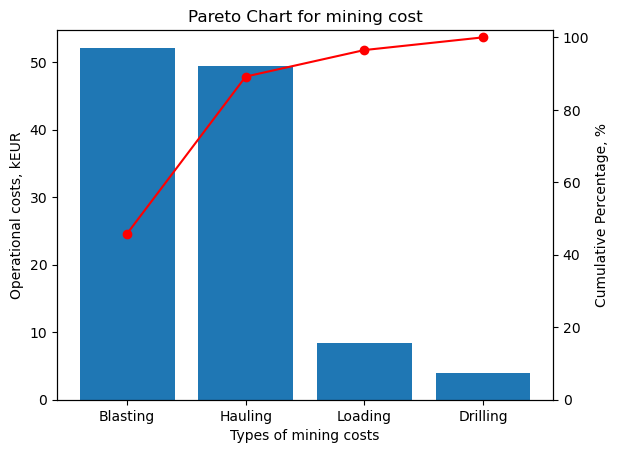

The total mining costs sum up to: 113.80 kEUR


In [44]:
example_total_costs = {"Drilling": example_costs_drilling["Costs"], 
                       "Blasting": example_costs_blasting["Costs"], 
                       "Loading": example_costs_loading["Costs"], 
                       "Hauling": example_costs_hauling["Costs"]}

pareto_chart(example_total_costs)
print(f"The total mining costs sum up to: {sum(example_total_costs.values()):.2f} kEUR")

As one can see, Blasting costs are the predominant mining costs, followed by Hauling costs. They sum up to over 80%, which means that if mining engineers want to improve the efficiency of the mining operation, they should seek out ways to improve their chocie of blast design and hauling technology, as well as haul equipment of method. In addition, when we are living in a modern world, data acquisition and accountability of key performance indicators is essential for reducing costs even more.

## Conclusion
To sum up, in this notebook we take a brief overview of how blasting is performed in a mining operation, as well as  how mining costs are calculated. Furthermore, we examined which operatiosn are more essential for the total mining costs and concluded that blast design and blasting technology, as well as hauling are essential for optimizing mining costs. This will be further examined in another notebook: *Vol. 2 - Open-pit blasting - Design optimization*.

Thank you for your attention! Don't forget to read the next part!